# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Axell Amadeus Siagian
- **Email:** axell.siagian@gmail.com
- **ID Dicoding:** xl_amadeus

## Menentukan Pertanyaan Bisnis

- Lokasi geografis (state) mana yang memiliki volume pembelian tertinggi?
- Seberapa sering pelanggan melakukan pembelian yang berulang?
- Kategori produk apa yang memiliki tingkat kepuasan yang tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sn
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [2]:
# CSV untuk semua customer
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# CSV untuk lokasi kota
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# CSV untuk order yang ada
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# CSV untuk tipe pembayaran
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# CSV untuk review dari order
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# CSV untuk order yang ada
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# CSV untuk kategori
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# CSV untuk semua produk yang dijual
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# CSV untuk semua penjual dalam platform
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai Semua Dataframe yang di-impor

##### Menilai dataframe customer

In [11]:
# Melihat informasi mengenai dataframe customer
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# Mencari data duplikat
print("Jumlah duplikasi customers_df: ",customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi customers_df:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
# Mencari data yang Null
print("Mencari data Null: ", customers_df.isna().sum())

Mencari data Null:  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


##### Menilai dataframe geolocation

In [14]:
# Melihat informasi mengenai dataframe customer
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
# Mencari data duplikat
print("Jumlah duplikasi geolocation_df: ",geolocation_df.duplicated().sum())
geolocation_df.describe(include="all")

Jumlah duplikasi geolocation_df:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [16]:
# Mencari data yang Null
print("Mencari data Null: ", geolocation_df.isna().sum())

Mencari data Null:  geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


##### Menilai dataframe order items

In [17]:
# Melihat informasi mengenai dataframe order items
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# Mencari data duplikat
print("Jumlah duplikasi order_items_df: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi order_items_df:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [19]:
# Mencari data yang Null
print("Mencari data Null: ", order_items_df.isna().sum())

Mencari data Null:  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


##### Menilai dataframe order payments

In [20]:
# Melihat informasi mengenai dataframe order payments
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
# Mencari data duplikat
print("Jumlah duplikasi order_payments_df: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi order_payments_df:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
# Mencari data yang Null
print("Mencari data Null: ", order_payments_df.isna().sum())

Mencari data Null:  order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


##### Menilai dataframe order reviews

In [23]:
# Melihat informasi mengenai dataframe order reviews
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
# Mencari data duplikat
print("Jumlah duplikasi order_reviews_df: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi order_reviews_df:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [25]:
# Mencari data yang Null
print("Mencari data Null: ", order_reviews_df.isna().sum())

Mencari data Null:  review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


##### Menilai dataframe orders

In [26]:
# Melihat informasi mengenai dataframe orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
# Mencari data duplikat
print("Jumlah duplikasi orders_df: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi orders_df:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
# Mencari data yang Null
print("Mencari data Null: ", orders_df.isna().sum())

Mencari data Null:  order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


##### Menilai dataframe product category

In [29]:
# Melihat informasi mengenai dataframe product category
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
# Mencari data duplikat
print("Jumlah duplikasi product_category_df: ",product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi product_category_df:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [31]:
# Mencari data yang Null
print("Mencari data Null: ", product_category_df.isna().sum())

Mencari data Null:  product_category_name            0
product_category_name_english    0
dtype: int64


#### Menilai dataframe products

In [32]:
# Melihat informasi mengenai dataframe products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
# Mencari data duplikat
print("Jumlah duplikasi products_df: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi products_df:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [34]:
# Mencari data yang Null
print("Mencari data Null: ", products_df.isna().sum())

Mencari data Null:  product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


##### Menilai dataframe sellers

In [35]:
# Melihat informasi mengenai dataframe sellers
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
# Mencari data duplikat
print("Jumlah duplikasi sellers_df: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi sellers_df:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [37]:
# Mencari data yang Null
print("Mencari data Null: ", sellers_df.isna().sum())

Mencari data Null:  seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


### Cleaning Data

##### Membersihkan dataframe order items

In [38]:
# Perbaiki tipe data dari order items
kolom_perbaiki = ["shipping_limit_date"]

for kolom in kolom_perbaiki:
  order_items_df[kolom] = pd.to_datetime(order_items_df[kolom])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### Membersihkan dataframe order reviews

In [39]:
# Perbaiki tipe data dari order reviews
kolom_perbaiki = ["review_creation_date","review_answer_timestamp"]

for kolom in kolom_perbaiki:
  order_reviews_df[kolom] = pd.to_datetime(order_reviews_df[kolom])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Membersihkan dataframe orders

In [40]:
# Perbaiki tipe data dari orders
kolom_perbaiki = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for kolom in kolom_perbaiki:
  orders_df[kolom] = pd.to_datetime(orders_df[kolom])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [41]:
# Drop semua order yang tidak memiliki order_status "delivered"
# Hal ini dilakukan karena analisi yang saya lakukan tidak memerlukan orderan yang belum diterima pelanggan
orders_df.drop(orders_df[orders_df['order_status'] != 'delivered'].index, inplace=True)
orders_df.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96478,96464,96476,96470,96478
mean,2018-01-01 23:29:31.939913984,2018-01-02 10:53:23.338012160,2018-01-05 05:01:50.912330240,2018-01-14 12:41:33.581683456,2018-01-25 17:09:52.325711616
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:00:23.249999872,2017-09-14 14:48:54,2017-09-18 16:46:13.249999872,2017-09-25 22:15:09.500000,2017-10-05 00:00:00
50%,2018-01-20 19:45:45,2018-01-22 13:50:04,2018-01-24 16:13:47.500000,2018-02-02 19:32:21,2018-02-16 00:00:00
75%,2018-05-05 18:54:47,2018-05-06 10:57:24.750000128,2018-05-08 14:35:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


##### Membersihkan dataframe products

In [42]:
# Mengisi semua produk yang tidak memiliki nama kategori dengan nilai "other"
products_df['product_category_name'].fillna(value='other', inplace=True)

## Exploratory Data Analysis (EDA)

### Explorasi dataframe orders

In [43]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
31295,93b9173d182af83f59074baf05d8c13e,75465accefc98db11062d9f8b89482b5,delivered,2018-03-30 13:22:07,2018-03-30 14:08:01,2018-04-04 00:18:20,2018-05-22 17:04:19,2018-04-23
38823,216466e0c94bda506e25adf7e905c5ef,646d64026bb6cf9f9d2e771af5d54ff1,delivered,2017-07-28 09:55:03,2017-07-28 10:05:56,2017-07-28 19:32:44,2017-08-04 22:49:58,2017-08-23
92772,95617572e4e39b8b9f5384d136111f93,1801ef99dbe925417e3103f8adafb25a,delivered,2018-02-03 09:59:51,2018-02-03 10:33:40,2018-02-05 23:33:53,2018-02-20 16:07:14,2018-03-08
76612,300449403bc51b74937be794d4999da9,8fb42545bfc44763da22b9bf84a47cc1,delivered,2018-01-09 17:37:24,2018-01-10 10:32:16,2018-01-15 18:07:19,2018-01-20 14:32:38,2018-02-05
24919,f161d2927f0847f8fd74ebeb8a7b3a80,00a49178247b91322bdca02625e81f7a,delivered,2017-07-02 09:51:03,2017-07-04 04:10:17,2017-07-05 15:12:45,2017-07-19 16:45:52,2017-08-02


In [44]:
orders_df.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96478,96464,96476,96470,96478
mean,2018-01-01 23:29:31.939913984,2018-01-02 10:53:23.338012160,2018-01-05 05:01:50.912330240,2018-01-14 12:41:33.581683456,2018-01-25 17:09:52.325711616
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:00:23.249999872,2017-09-14 14:48:54,2017-09-18 16:46:13.249999872,2017-09-25 22:15:09.500000,2017-10-05 00:00:00
50%,2018-01-20 19:45:45,2018-01-22 13:50:04,2018-01-24 16:13:47.500000,2018-02-02 19:32:21,2018-02-16 00:00:00
75%,2018-05-05 18:54:47,2018-05-06 10:57:24.750000128,2018-05-08 14:35:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


### Explorasi dataframe customers

In [45]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
64259,21d39c44e49d24cbd3e842263e1672b1,0a4e93797d441e3a488a029b13ab40d1,18900,santa cruz do rio pardo,SP
7983,806f7c1753a3be75c708138b58666ea3,e191f967ed2ad2b93ad1c8117e6daa1a,52051,recife,PE
69083,e514a24b58fccb3ca7218947874f1710,01c7e32e214b3b0c31b7460a08e89ec9,13466,americana,SP
14156,241a20babe281dff9201cd9abc43b96a,2e2fa0fb69bc20c284e174eda80bf5a4,12072,taubate,SP
71775,8d9813443f924294eea9930def4e9d33,8d4b6dc9879d8284a8d355e2e76c9877,91900,porto alegre,RS


In [46]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [47]:
# Menampilkan customer sesuai dengan kolom customer_state
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [48]:
# Menampilkan customer sesuai dengan kolom customer_city
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Explore dataframe customers & orders

In [49]:
# Menggabungkan customers dan orders untuk menentukan lokasi dari tiap order
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.describe()

,customer_zip_code_prefix
count,96478.000000
mean,35198.185358
std,29839.705392
min,1003.000000
25%,11355.000000
50%,24435.000000
75%,59056.000000
max,99980.000000


In [50]:
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [51]:
# Total order berdasarkan dengan masing-masing state ("customer_state")
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1279
PA      946
MT      886
MA      717
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

In [52]:
# Total order berdasarkan dengan masing-masing kota ("customer_city")
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head()

customer_city
sao paulo         15045
rio de janeiro     6601
belo horizonte     2697
brasilia           2071
curitiba           1489
Name: order_id, dtype: int64

In [53]:
customer_purchase_counts = customers_orders_df.groupby(by="customer_unique_id").order_id.nunique()
customer_purchase_counts = customer_purchase_counts[customer_purchase_counts > 1].sort_values(ascending=False)
customer_purchase_counts.head()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    15
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
Name: order_id, dtype: int64

### Explore dataframe geolocation

In [54]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
971260,95630,-29.650893,-50.848567,parobe,RS
509609,27937,-22.396200,-41.795112,macae,RJ
665304,39705,-18.553128,-42.766472,sao joao evangelista,MG
500334,26525,-22.807524,-43.420960,nilopolis,RJ
646262,38443,-18.635275,-48.205818,araguari,MG


In [55]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [56]:
# Menampilkan semua data geolocation sesuai dengan zip code
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

### Explore dataframe order reviews

In [57]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22905,ea1fbd19c48a016b08c92aa1daf658de,4c5fc08caca3c520b9c4cbf83d2c14f8,5,NaN,NaN,2017-11-30,2017-12-01 10:27:29
67185,8afddc4a135e897c765e801becec881d,c791c3d6d6bdfe8c90a3016bc03ec79f,5,NaN,Produto de ótima qualidade,2017-06-09,2017-06-12 16:14:17
79465,38e3b1545277fd53ad760ad49bde362b,9dfdc2ebd5ad6715951eced9ebfdd950,3,NaN,NaN,2018-07-13,2018-07-16 09:53:06
69157,68c8f97f1222a4974e1e81b6823e1cb0,e5fc7f4bcc4ae399fce686f65db2584d,5,NaN,NaN,2018-02-23,2018-02-24 09:20:18
50873,b889e8914f98c04f5ed85f576092d4fb,d2926e7840bb47e67fc52b79646cc2bb,5,NaN,NaN,2017-11-23,2017-11-23 11:06:21


In [58]:
order_reviews_df.describe(include="all", datetime_is_numeric=True)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


### Explore dataframe order items

In [59]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61761,8cf08ec6272b9383b4b0ec15a92d859d,1,9545d45c37449ccbc376de3a04c66e71,431af27f296bc6519d890aa5a05fdb11,2017-09-19 18:25:13,121.90,13.87
47829,6ca63d606e504f859e56df4534878101,1,4e674f56be3a9b8c94fafaa44cbba42e,a414555ce331b8c8aea4a9cb8395194d,2018-04-23 21:52:01,49.99,22.89
39159,58faef88b9fbcce2db4d1b68bdb0c2a3,3,547b95702aec86f05ac37e61d164891c,001cca7ae9ae17fb1caed9dfb1094831,2017-03-29 21:22:42,99.50,32.98
60790,8a8d2bb96afe472415715631b0751551,1,d1847c3f994dc0bb4d1248520ecb81f3,9f505651f4a6abe901a56cdc21508025,2018-03-12 03:55:39,269.00,15.63
4250,098f664519835e5af0a1f20f4d778fdf,1,cba32576375902a87170bedaed045b71,5dceca129747e92ff8ef7a997dc4f8ca,2017-12-22 13:29:39,887.00,26.70


In [60]:
order_items_df.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


#### Menggabungkan dataframe reviews & orders

In [61]:
# Menggabungkan customers dan orders untuk menentukan lokasi dari tiap order
reviews_orders_df = pd.merge(
    left=order_reviews_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_orders_df.describe()

,customer_zip_code_prefix
count,96478.000000
mean,35198.185358
std,29839.705392
min,1003.000000
25%,11355.000000
50%,24435.000000
75%,59056.000000
max,99980.000000


In [62]:
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### Explore dataframe products

In [63]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31391,97b91c8032defad1460e5225a0049161,moveis_decoracao,63.0,195.0,2.0,4000.0,100.0,7.0,65.0
19158,1cb60c9b90bc722828facc251de1cf94,utilidades_domesticas,51.0,684.0,1.0,9350.0,40.0,35.0,40.0
32016,bac7424a0fcd4e9803853a39685555ec,relogios_presentes,56.0,1461.0,4.0,180.0,18.0,11.0,13.0
1090,0bd478959805d86aabe80febd51789e4,esporte_lazer,55.0,985.0,1.0,717.0,18.0,15.0,18.0
26081,bc75afcd6671acc797fb53a6835c83c8,automotivo,47.0,406.0,1.0,1100.0,40.0,30.0,11.0


In [64]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [65]:
# Total produk berdasarkan dengan nama kategori ("product_category_name")
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

### Explore dataframe product category

In [66]:
product_category_df.sample(5)

,product_category_name,product_category_name_english
14,brinquedos,toys
27,construcao_ferramentas_jardim,costruction_tools_garden
9,relogios_presentes,watches_gifts
25,construcao_ferramentas_construcao,construction_tools_construction
62,casa_conforto_2,home_comfort_2


In [67]:
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### Menggabungkan products dan categories

In [68]:
products_categories_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


#### Menggabungkan products_categories dengan product items

In [69]:
items_products_categories_df = pd.merge(
    left=order_items_df,
    right=products_categories_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


#### Menggabungkan reviews_orders dan items_products_categories

In [70]:
items_products_categories_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [71]:
reviews_orders_items_products_categories_df = pd.merge(
    left=reviews_orders_df,
    right=items_products_categories_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
reviews_orders_items_products_categories_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools


In [72]:
agg = {
    'review_score': 'mean',
    'order_id': 'count'
}

# Kelompokkan sesuai dengan kategori produk
result = reviews_orders_items_products_categories_df.drop_duplicates('review_id')
result = result.groupby('product_category_name_english').agg(agg).reset_index()
result.columns = ['product_category_name', 'avg_review_score', 'num_orders']

# Sort dataframe sesuai dengan avg_review_score
sorted_result = result.sort_values(by='avg_review_score', ascending=False)
print(sorted_result)

        product_category_name  avg_review_score  num_orders
11          cds_dvds_musicals          4.666667          12
52                 la_cuisine          4.545455          11
29  fashion_childrens_clothes          4.500000           8
8      books_general_interest          4.467327         505
22    costruction_tools_tools          4.425532          94
..                        ...               ...         ...
23        diapers_and_hygiene          3.740741          27
27     fashio_female_clothing          3.725000          40
30      fashion_male_clothing          3.700000         110
57           office_furniture          3.625600        1250
61      security_and_services          2.500000           2

[71 rows x 3 columns]


In [73]:
reviews_orders_items_products_categories_customer_df = pd.merge(
    left=reviews_orders_items_products_categories_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
reviews_orders_items_products_categories_customer_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,1.0,1300.0,30.0,30.0,35.0,sports_leisure,68a5590b9926689be4e10f4ae2db21a8,6030.0,osasco,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,1.0,1300.0,30.0,30.0,35.0,sports_leisure,68a5590b9926689be4e10f4ae2db21a8,6030.0,osasco,SP
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,1.0,245.0,19.0,14.0,14.0,computers_accessories,64190b91b656ab8f37eb89b93dc84584,13380.0,nova odessa,SP
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,1.0,6550.0,20.0,20.0,20.0,computers_accessories,1d47144362c14e94ccdd213e8ec277d5,44571.0,santo antonio de jesus,BA
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,2.0,7650.0,20.0,20.0,20.0,garden_tools,c8cf6cb6b838dc7a33ed199b825e8616,88735.0,gravatal,SC


### Explore dataframe order payments

In [74]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
32015,e75fa6144e2d8bfb834bba12ac534788,1,credit_card,1,71.96
73748,caf12c43defcd1c679e73f2398192965,1,credit_card,1,75.15
99570,36c2be04c43db09655628dc1658e5c97,1,credit_card,3,123.07
86014,c5a8ec0541df6eec6a1b4c5ce463f56b,1,boleto,1,52.71
85574,cd44314b084629fc21d3a0dca3147f7d,1,credit_card,10,465.27


In [75]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [76]:
# Mencari order dengan nilai pembayaran yang paling besar
order_payments_df_sorted = order_payments_df.sort_values(by='payment_value',ascending=False).head()
order_payments_df_sorted.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


### Explore dataframe sellers

In [77]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2550,bbf9ad41dca6603e614efcdad7aab8c4,60348,fortaleza,CE
1757,2379bdc3888025689a9deb7b141507d5,13806,mogi mirim,SP
1714,c500367424994318b9e779ff1ae9a330,13145,paulinia,SP
448,75fdd0a732287f9497b179f6bd445d32,9350,maua,SP
1750,5b179e9e8cc7ab6fd113a46ca584da81,5424,sao paulo,SP


In [78]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [79]:
# Mencari tau tentang kota mana memiliki jumlah penjual yang paling banyak
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

### Explore all data

In [80]:
all_data_df = pd.merge(
    left=reviews_orders_items_products_categories_customer_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

In [81]:
all_data_df = pd.merge(
    left=all_data_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df = all_data_df.drop_duplicates('order_id')
all_data_df.info()
all_data_df.to_csv("data/all_data_df.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98673 entries, 0 to 118145
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      98673 non-null  object        
 1   order_id                       98673 non-null  object        
 2   review_score                   98673 non-null  int64         
 3   review_comment_title           11551 non-null  object        
 4   review_comment_message         40785 non-null  object        
 5   review_creation_date           98673 non-null  datetime64[ns]
 6   review_answer_timestamp        98673 non-null  datetime64[ns]
 7   customer_id                    95832 non-null  object        
 8   order_status                   95832 non-null  object        
 9   order_purchase_timestamp       95832 non-null  datetime64[ns]
 10  order_approved_at              95818 non-null  datetime64[ns]
 11  order_delivere

In [82]:
# Mencari score review paling rendah dan paling tinggi untuk masing-masing category
agg = {
    "order_id": "nunique",
    "review_score":  ["min", "max"]
}
all_data_df.groupby(by="product_category_name_english").agg(agg).reset_index()

product_category_name_english order_id review_score    
                                  nunique          min max
0     agro_industry_and_commerce      182            1   5
1               air_conditioning      248            1   5
2                            art      196            1   5
3          arts_and_craftmanship       22            1   5
4                          audio      343            1   5
..                           ...      ...          ...  ..
66                    stationery     2278            1   5
67        tablets_printing_image       75            1   5
68                     telephony     4151            1   5
69                          toys     3828            1   5
70                 watches_gifts     5554            1   5

[71 rows x 4 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Lokasi geografis (state) mana yang memiliki volume pembelian tertinggi?

In [83]:
all_data_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,6030.0,osasco,SP,14600.0,sao joaquim da barra,SP,1.0,credit_card,8.0,397.26
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,13380.0,nova odessa,SP,12233.0,sao jose dos campos,SP,1.0,credit_card,1.0,88.09
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,44571.0,santo antonio de jesus,BA,37175.0,ilicinea,MG,1.0,credit_card,1.0,194.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,88735.0,gravatal,SC,37175.0,ilicinea,MG,1.0,credit_card,1.0,222.84
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,...,89520.0,curitibanos,SC,81730.0,curitiba,PR,1.0,credit_card,10.0,1333.25


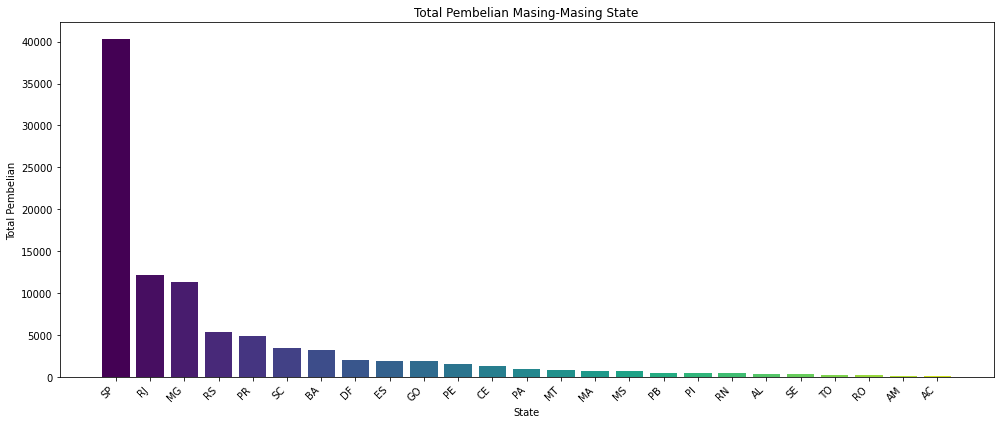

In [84]:
agg = {
    "order_id": "count"
}

pembelian_states = all_data_df[all_data_df['order_status'] == 'delivered'].groupby('customer_state').agg(agg).reset_index()
pembelian_states.columns = ['customer_state', 'total_rows']
pembelian_states = pembelian_states.sort_values(by='total_rows', ascending=False)
pembelian_states_tertinggi = pembelian_states.head(25)

# Warna untuk plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(pembelian_states)))

# Plotting data
plt.figure(figsize=(14, 6))
bars = plt.bar(pembelian_states_tertinggi['customer_state'], pembelian_states_tertinggi['total_rows'], color=colors)

# Menambahkan judul dan label
plt.title('Total Pembelian Masing-Masing State')
plt.xlabel('State')
plt.ylabel('Total Pembelian')

# Membuat plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

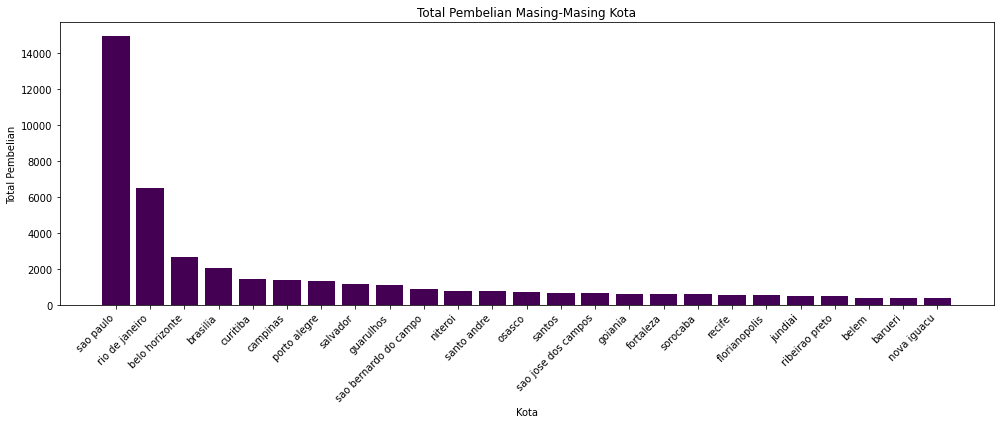

In [85]:
agg = {
    "order_id": "count"
}

pembelian_city = all_data_df[all_data_df['order_status'] == 'delivered'].groupby('customer_city').agg(agg).reset_index()
pembelian_city.columns = ['customer_city', 'total_rows']
pembelian_city = pembelian_city.sort_values(by='total_rows', ascending=False)
pembelian_city_tertinggi = pembelian_city.head(25)

# Warna untuk plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(pembelian_city)))

# Plotting data
plt.figure(figsize=(14, 6))
bars = plt.bar(pembelian_city_tertinggi['customer_city'], pembelian_city_tertinggi['total_rows'], color=colors)

# Menambahkan judul dan label
plt.title('Total Pembelian Masing-Masing Kota')
plt.xlabel('Kota')
plt.ylabel('Total Pembelian')

# Membuat plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Seberapa sering pelanggan melakukan pembelian yang berulang?

In [86]:
customer_purchase_counts = all_data_df.groupby(by="customer_unique_id").order_id.nunique()
customer_purchase_counts = customer_purchase_counts.sort_values(ascending=False)
customer_purchase_counts.columns = ['customer_unique_id', 'count']
customer_purchase_counts

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    15
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5655967ad654dc2d2affca3502631db7     1
56556a95d541c4ca3745744d9aeebc00     1
56550de806540216e8a5fd85d5597678     1
565482c4a27a7c7f86870a5ab4ea0a85     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: order_id, Length: 92755, dtype: int64

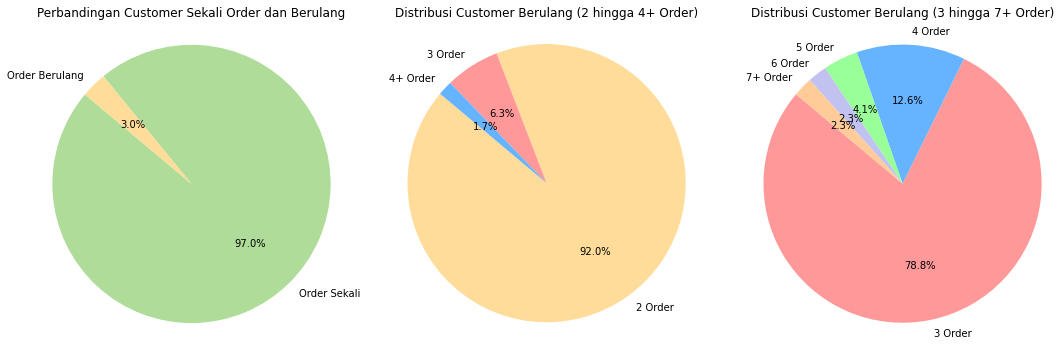

In [87]:
# Mencari semua customer yang unik
transaction_counts = all_data_df.groupby('customer_unique_id').size().reset_index(name='transaction_count')

# Warna khusus
colors = {2:'#ffdc99', 3: '#ff9999', 4: '#66b3ff', 5: '#99ff99', 6: '#c2c2f0', 7: '#ffcc99'}

# Menghitung total dari customer
total_customers = len(transaction_counts)

# Menghitung customer yang order sebanyak 1 kali atau lebih
single_transaction_count = (transaction_counts['transaction_count'] == 1).sum()
multiple_transaction_count = total_customers - single_transaction_count
multiple_transactions = transaction_counts[transaction_counts['transaction_count'] > 0]
multiple_transactions = multiple_transactions.groupby('transaction_count').size().reset_index(name='customer_count')

# Plotting pie chart untuk perbandingan transaksi satu kali dan yang berulang
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie([single_transaction_count, multiple_transaction_count], labels=['Order Sekali', 'Order Berulang'], autopct='%1.1f%%', startangle=140, colors=['#Afdc99', '#ffdc99'])
plt.title('Perbandingan Customer Sekali Order dan Berulang')
plt.axis('equal')

# Plotting pie chart perbandingan transaksi 2, 3, dan 4 atau lebih
plt.subplot(1, 3, 2)
sizes = [multiple_transactions[multiple_transactions['transaction_count'] == 2]['customer_count'].values[0],
         multiple_transactions[multiple_transactions['transaction_count'] == 3]['customer_count'].values[0],
         multiple_transactions[multiple_transactions['transaction_count'] >= 4]['customer_count'].sum()]
labels = ['2 Order', '3 Order', '4+ Order']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[colors[int(label[0])] for label in labels])
plt.title('Distribusi Customer Berulang (2 hingga 4+ Order)')
plt.axis('equal')

# Plotting pie chart perbandingan transaksi 3, 4, 5, 6, dan 7 atau lebih
plt.subplot(1, 3, 3)
sizes = [multiple_transactions[multiple_transactions['transaction_count'] == 3]['customer_count'].values[0],
         multiple_transactions[multiple_transactions['transaction_count'] == 4]['customer_count'].values[0],
         multiple_transactions[multiple_transactions['transaction_count'] == 5]['customer_count'].values[0],
         multiple_transactions[multiple_transactions['transaction_count'] == 6]['customer_count'].values[0],
         multiple_transactions[multiple_transactions['transaction_count'] >= 7]['customer_count'].sum()]
labels = ['3 Order', '4 Order', '5 Order', '6 Order', '7+ Order']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[colors[int(label[0])] for label in labels])
plt.title('Distribusi Customer Berulang (3 hingga 7+ Order)')
plt.axis('equal')

# Show plots
plt.tight_layout()
plt.show()

### Pertanyaan 3: Kategori produk apa yang memiliki tingkat kepuasan yang tertinggi?

In [88]:
agg = {
    'review_score': 'mean',
    'order_id': 'count'
}

# Kelompokkan sesuai dengan kategori produk
result = all_data_df.groupby('product_category_name_english').agg(agg).reset_index()
result.columns = ['product_category_name', 'avg_review_score', 'num_orders']

# Sort dataframe sesuai dengan avg_review_score
sorted_result = result.sort_values(by='avg_review_score', ascending=False)

print(sorted_result)

        product_category_name  avg_review_score  num_orders
11          cds_dvds_musicals          4.666667          12
52                 la_cuisine          4.545455          11
29  fashion_childrens_clothes          4.500000           8
8      books_general_interest          4.467327         505
22    costruction_tools_tools          4.425532          94
..                        ...               ...         ...
23        diapers_and_hygiene          3.740741          27
30      fashion_male_clothing          3.702703         111
27     fashio_female_clothing          3.692308          39
57           office_furniture          3.624701        1255
61      security_and_services          2.500000           2

[71 rows x 3 columns]


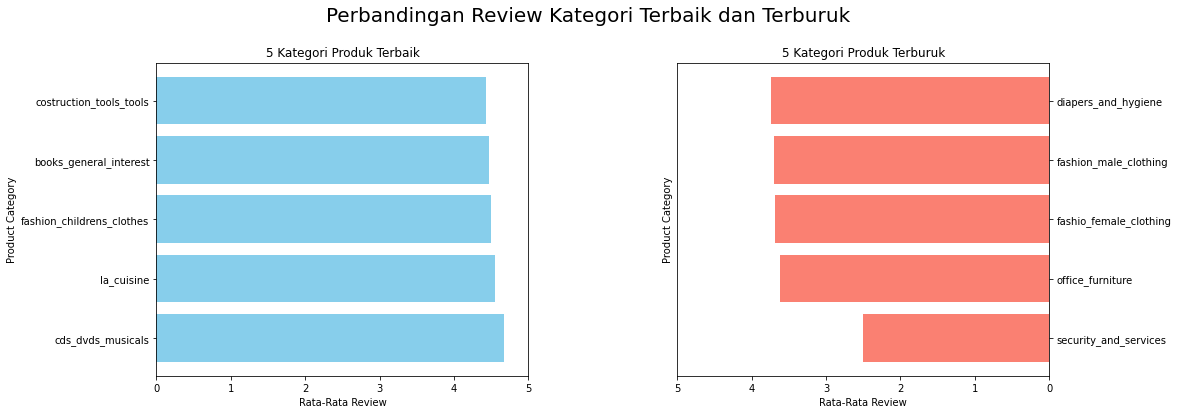

In [89]:
# Memilih 5 kategori terbaik dan terburuk
top_categories = sorted_result.head(5)
bottom_categories = sorted_result.tail(5)

# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting kategori terbaik
axs[0].barh(top_categories['product_category_name'], top_categories['avg_review_score'], color='skyblue')
axs[0].set_title('5 Kategori Produk Terbaik')
axs[0].set_xlabel('Rata-Rata Review')
axs[0].set_ylabel('Product Category')
axs[0].set_xlim(0, 5)

# Plotting kategori terburuk
axs[1].barh(bottom_categories['product_category_name'][::-1], bottom_categories['avg_review_score'][::-1], color='salmon')
axs[1].set_title('5 Kategori Produk Terburuk')
axs[1].set_xlabel('Rata-Rata Review')
axs[1].set_ylabel('Product Category')
axs[1].set_xlim(5, 0)
axs[1].yaxis.tick_right()

# Menyesuaikan layout
plt.subplots_adjust(top=0.85, wspace=0.4)

# Show plot
plt.suptitle("Perbandingan Review Kategori Terbaik dan Terburuk", fontsize=20)
plt.show()

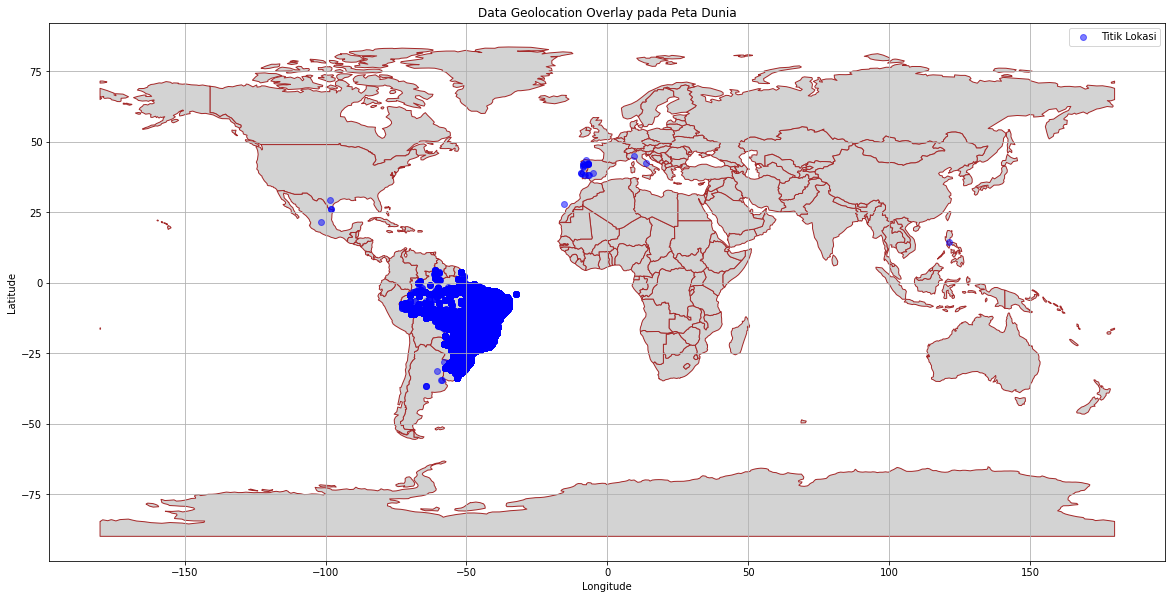

In [90]:
# Load the shapefile for Brazil
earth = gpd.read_file("data/earth.shp")

# Create a sample dataframe (replace this with your actual dataframe)
df = geolocation_df

# Plot the map of Brazil
fig, ax = plt.subplots(figsize=(20, 12))
earth.plot(ax=ax, color='lightgrey', edgecolor='brown')

# Plot the locations on top of the map
ax.scatter(df['geolocation_lng'], df['geolocation_lat'], color='blue', alpha=0.5, label='Titik Lokasi')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Data Geolocation Overlay pada Peta Dunia')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- Lokasi geografis (state) mana yang memiliki volume pembelian tertinggi?
> State yang memiliki volume pembelian tertinggi adalah Sao Paulo (SP), Rio de Janeiro (RJ), Belo Horizonta (MG), Porto Alegre (RS), dan Curitiba (PR).
- Seberapa sering pelanggan melakukan pembelian yang berulang?
> Sebanyak 2542 pelanggan melakukan pembelian ulang yaitu sekitar 3% dari seluruh daftar pelanggan. Sebanyak 222 pelanggan melakukan order 3 atau lebih kali.
- Kategori produk apa yang memiliki tingkat kepuasan yang tertinggi?
> 5 review kategori terbaik terdiri dari CD dan DVD musik, masakan pakaian anak, buku umum, dan peralatan konstruksi. Sedangkan review kategori produk terburuk adalah popok dan alat kebersihan, pakaian fashion wanita, pakaian fashion pria, perabot kantor, dan layanan keamanan.